In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [2]:
delays_df = pd.read_csv('FlightDelays.csv')
delays_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'FlightDelays.csv'

In [ ]:
delays_df.info()

In [ ]:
#a) Create a binary outcome variable called is_delayed that takes the value 1 if flight_status = delayed and 0 otherwise.
delays_df['is_delayed'] = [1 if status == 'delayed' else 0 for status in delays_df['flight_status']]
delays_df.head()

In [ ]:
#b) Transform day_of_week into a categorical variable. This step is required to create dummies for days. 
delays_df.day_of_week= delays_df.day_of_week.astype('category')

c) Categorize departure_time into hourly intervals between 6:00 AM and 10:00 PM. 
Then, transform it into a categorical variable.create hourly bins departure time 
Some possible approaches:

#Approach 1: rounds 1715 to 17. 1455 to 15. It may not be the best way, because it rounds 1445 to 14, but 1445 is actually closer to 15.

#Approach 2: rounds 16:35 to 17, 16:25 to 16. The bin for hour 16 has values between 1531 and 1630

#Approach 3: simply takes the first two digits to create bins. It rounds the departure times starting with 16 to 16.

In [ ]:
#Approach 1: 
#delays_df.departure_time = [round(t / 100) for t in delays_df.departure_time]
#Approach 2:
#delays_df.departure_time = [(t//100) if t%100<=30 else (t//100)+1 for t in delays_df.departure_time]
#Approach 3:
delays_df.departure_time = delays_df.departure_time//100

delays_df.departure_time = delays_df.departure_time.astype('category')
delays_df.head()


In [ ]:
predictors = ['day_of_week', 'departure_time', 'origin', 'destination', 'carrier']
outcome = 'is_delayed'

X_df = pd.get_dummies(delays_df[predictors], drop_first=True)
X = sm.add_constant(X_df)
y = delays_df[outcome]
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 11)

In [ ]:
X.head()

In [ ]:
X_features = list(deposit_df.columns)
X_features.remove('is_subscribed')

outcome = 'is_subscribed'

X_df = pd.get_dummies(deposit_df[X_features], drop_first=True)
X = sm.add_constant(X_df)
y = deposit_df[outcome]
X.head()


In [10]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.465323
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.087     
Dependent Variable: is_delayed       AIC:              1294.4527 
Date:               2021-11-19 23:43 BIC:              1465.5705 
No. Observations:   1320             Log-Likelihood:   -614.23   
Df Model:           32               LL-Null:          -672.82   
Df Residuals:       1287             LLR p-value:      1.2031e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const              0.4356   0.6635  0.6566 0.5114 -0.8648  1.7360
day_of_week_2     -0.3865   0.2475 -1.5614 0.1184 -0.8716  0.0986
day_of_week_3     -0.5589   0.2531 -2.2084 0.0272 -1.0549 -0.0629
day_of_week_4     -0.8843   0.2556 -3.4590 0.0005 -1.3854 -0.3832
day_of_week_5     -0.6924   0.2435 -2.8433 0.0045 -1.1696 -0.2151
day_of_week_6     -1.5455   0.3380 -4.5728 0.0000 -2.2079 -0.8831
day_of_week_7     -0.3828   0.2657 -1.4409 0.1496 -0.9035  0.1379
departure_time_7  -0.0138   0.4492 -0.0307 0.9755 -0.8941  0.8665
departure_time_8   0.0674   0.4433  0.1520 0.8791 -0.8015  0.9363
departure_time_9  -0.0521   0.4905 -0.1061 0.9155 -1.0134  0.9093
departure_time_10 -1.0272   0.5928 -1.7328 0.0831 -2.1891  0.1347
departure_time_11  0.1371   0.5985  0.2291 0.8188 -1.0359  1.3101
departure_time_12 -0.3281   0.4792 -0.6847 0.4935 -1.2673  0.6111
departure_time_13 -0.5114   0.4616 -1.1079 0.2679 -1.4161  0.3933
departure_time_14  0.7152   0.3831  1.8668 0.0619 -0.0357  1.4661
departure_time_15  0.7468   0.4023  1.8560 0.0635 -0.0418  1.5353
departure_time_16  0.3172   0.4014  0.7903 0.4294 -0.4695  1.1039
departure_time_17  0.4187   0.3756  1.1147 0.2650 -0.3175  1.1548
departure_time_18  0.5601   0.5018  1.1163 0.2643 -0.4233  1.5436
departure_time_19  1.1427   0.4339  2.6339 0.0084  0.2924  1.9930
departure_time_20  0.9358   0.5541  1.6888 0.0913 -0.1503  2.0219
departure_time_21  0.4473   0.4144  1.0796 0.2803 -0.3648  1.2595
origin_DCA        -0.8284   0.4102 -2.0198 0.0434 -1.6323 -0.0246
origin_IAD        -0.5465   0.4042 -1.3521 0.1763 -1.3387  0.2457
destination_JFK   -0.1677   0.3254 -0.5153 0.6063 -0.8055  0.4701
destination_LGA    0.1883   0.3304  0.5697 0.5689 -0.4594  0.8359
carrier_DH        -0.6986   0.5634 -1.2401 0.2149 -1.8028  0.4055
carrier_DL        -1.4335   0.5151 -2.7828 0.0054 -2.4431 -0.4239
carrier_MQ        -0.4311   0.4944 -0.8720 0.3832 -1.4000  0.5379
carrier_OH        -2.4591   0.9978 -2.4644 0.0137 -4.4148 -0.5033
carrier_RU        -0.5520   0.4125 -1.3380 0.1809 -1.3605  0.2566
carrier_UA        -0.6422   0.8977 -0.7154 0.4744 -2.4017  1.1173
carrier_US        -1.7221   0.5237 -3.2883 0.0010 -2.7486 -0.6957
=================================================================

"""

In [11]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.Logit(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;
        
significant_Features = backward_elimination(logit_model, y_train, X_train, X_df.columns)
print(significant_Features)

X_train = sm.add_constant(X_train[significant_Features])
logit2 = sm.Logit(y_train, X_train)
logit_model2 = logit2.fit()
logit_model2.summary2()

Dropping departure_time_7 and running regression again because pvalue is: 0.9754995757140554
Optimization terminated successfully.
         Current function value: 0.465323
         Iterations 7
Dropping departure_time_9 and running regression again because pvalue is: 0.9175335078921891
Optimization terminated successfully.
         Current function value: 0.465327
         Iterations 7
Dropping departure_time_8 and running regression again because pvalue is: 0.8201775362104496
Optimization terminated successfully.
         Current function value: 0.465347
         Iterations 7
Dropping departure_time_11 and running regression again because pvalue is: 0.8003587937162892
Optimization terminated successfully.
         Current function value: 0.465371
         Iterations 7
Dropping destination_JFK and running regression again because pvalue is: 0.6007474745502226
Optimization terminated successfully.
         Current function value: 0.465474
         Iterations 7
Dropping departure_time_1

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.064     
Dependent Variable:  is_delayed       AIC:              1279.1671 
Date:                2021-11-19 23:43 BIC:              1331.0210 
No. Observations:    1320             Log-Likelihood:   -629.58   
Df Model:            9                LL-Null:          -672.82   
Df Residuals:        1310             LLR p-value:      8.3015e-15
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -1.1612   0.1087 -10.6779 0.0000 -1.3743 -0.9481
day_of_week_4     -0.4443   0.2012  -2.2081 0.0272 -0.8386 -0.0499
day_of_week_6     -1.1288   0.2956  -3.8187 0.0001 -1.7081 -0.5494
departure_time_14  0.5928   0.2178   2.7222 0.0065  0.1660  1.0196
departure_time_15  0.6842   0.2526   2.7085 0.0068  0.1891  1.1792
departure_time_17  0.5183   0.2119   2.4460 0.0144  0.1030  0.9336
departure_time_19  1.2040   0.2915   4.1307 0.0000  0.6327  1.7752
departure_time_20  0.9461   0.4585   2.0636 0.0391  0.0475  1.8448
carrier_DL        -0.9016   0.2175  -4.1449 0.0000 -1.3279 -0.4753
carrier_US        -1.1432   0.2328  -4.9104 0.0000 -1.5995 -0.6869
==================================================================

"""

In [12]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": logit_model2.predict( 
                        sm.add_constant(X_test[significant_Features] ) ) } )
y_pred_df['predicted1'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.head()

,actual,predicted_prob,predicted1
908,1,0.344586,0
1974,0,0.238450,0
1009,0,0.238450,0
530,1,0.141541,0
1400,0,0.090758,0


In [13]:
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    tp = cm[0][0]
    fp = cm[1][0]
    fn = cm[0][1]
    tn = cm[1][1]
    print('True positive = ', tp)
    print('False positive = ' , fp)
    print('False negative = ' , fn)
    print('True negative = ', tn)
    #or you can use the following to access above metrics: 
    #tn, fp, fn, tp = metrics.confusion_matrix(actual, predicted).ravel()
    print('Accuracy = ', (tp+tn)/(tp+tn+fn+fp))
    print('True positive rate = ', tp/(tp+fn))   
    print('True negative rate = ', tn/(tn+fp))
    print('False positive rate = ', fp/(tn+fp))
    print('False negative rate = ', fn/(fn+tp))
    
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = ["Delayed", "Not delayed"] , 
               yticklabels = ["Delayed", "Not delayed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


True positive =  13
False positive =  18
False negative =  142
True negative =  708
Accuracy =  0.8183881952326901
True positive rate =  0.08387096774193549
True negative rate =  0.9752066115702479
False positive rate =  0.024793388429752067
False negative rate =  0.9161290322580645


C:\Users\yasem\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


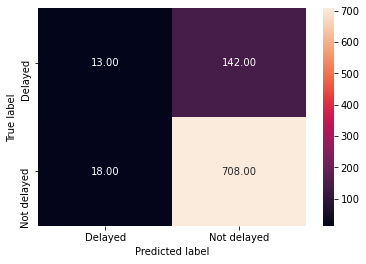

In [14]:
draw_cm(y_pred_df.actual, y_pred_df.predicted1)

In [15]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

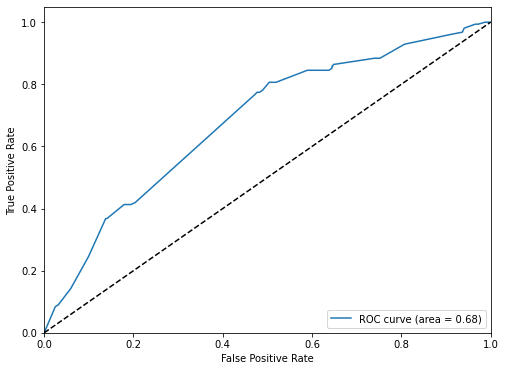

In [16]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

In [17]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob)
round(float(auc_score),2)

0.68

In [18]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
                         'fpr': fpr, 
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
16,0.806452,0.504132,0.186949,0.302319
13,0.774194,0.476584,0.213646,0.297610
12,0.767742,0.472452,0.238450,0.295290
17,0.806452,0.513774,0.175883,0.292678
14,0.774194,0.482094,0.204521,0.292100


In [19]:
y_pred_df['predicted2'] = y_pred_df.predicted_prob.map( 
                                lambda x: 1 if x > 0.18 else 0)
y_pred_df.head()

,actual,predicted_prob,predicted1,predicted2
908,1,0.344586,0,1
1974,0,0.238450,0,1
1009,0,0.238450,0,1
530,1,0.141541,0,0
1400,0,0.090758,0,0


True positive =  125
False positive =  366
False negative =  30
True negative =  360
Accuracy =  0.5505107832009081
True positive rate =  0.8064516129032258
True negative rate =  0.49586776859504134
False positive rate =  0.5041322314049587
False negative rate =  0.1935483870967742


C:\Users\yasem\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


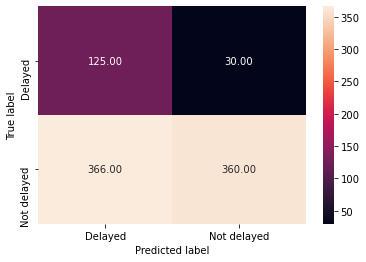

In [20]:
draw_cm(y_pred_df.actual, y_pred_df.predicted2)

In [21]:
#cost-based approach
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [22]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [23]:
idx = 0

## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range(10, 50):
    cost = get_total_cost(y_pred_df.actual, 
                          y_pred_df.predicted_prob.map( 
            lambda x: 1 if x > (each_prob/100)  else 0), 1, 3 )
    cost_df.loc[idx] = [(each_prob/100), cost] 
    idx += 1

In [24]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
21,0.31,394.0
22,0.32,394.0
23,0.33,394.0
24,0.34,394.0
20,0.30,394.0


In [25]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.31 else 0)

True positive =  57
False positive =  100
False negative =  98
True negative =  626
Accuracy =  0.775255391600454
True positive rate =  0.36774193548387096
True negative rate =  0.8622589531680441
False positive rate =  0.13774104683195593
False negative rate =  0.632258064516129


C:\Users\yasem\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


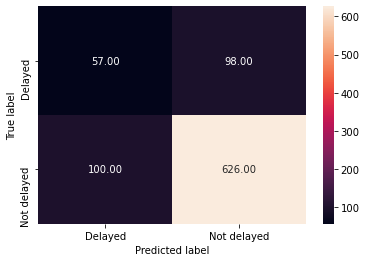

In [26]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_using_cost )